In [1]:
'''
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')
!pip install -i https://pypi.gurobi.com gurobipy
!pip install cplex
!pip install docplex
!pip install scikit-fuzzy
'''

"\nfrom google.colab import drive\ndrive.mount('/content/gdrive')\nimport sys\nsys.path.append('/content/gdrive/My Drive/Colab Notebooks')\n!pip install -i https://pypi.gurobi.com gurobipy\n!pip install cplex\n!pip install docplex\n!pip install scikit-fuzzy\n"

In [2]:
import logging
import numpy as np
import pandas as pd

from src.datasets import load_iris
from src.model_selection import grid_search, score_zoom
from src.shadow_learn import ShadowedSetEstimator
from src.utils import create_logfile, log_last_execution 
from src.plot import plot_shadowed_set

In [3]:
log = False
create_logfile('grid_search_tensorflow_two_phases_iris',
              'Started Grid Search for TensorFlow Two Phases Models on Iris dataset', log)

In [4]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
label_colors = ['cornflowerblue', 'mediumseagreen', 'crimson']

contourf_colors = ['white', 'pink', 'palevioletred', 'red']

In [5]:
estimator = ShadowedSetEstimator(solver='tensorflow-two-phases')

## Iris-virginica conservative metric GridSearch

In [6]:
dataset_loader = lambda: load_iris(d='all', target='Iris-virginica')

In [7]:
C0_range = np.concatenate((np.logspace(-2, 1, 5), []))
C1_range = np.concatenate((np.logspace(-2, 1, 5), []))
sigma_range = np.concatenate((np.logspace(-1, 2, 5), []))
param_grid = {'C0': C0_range, 'C1': C1_range, 'sigma': sigma_range}

In [8]:
# %tensorflow_version 2.x
# import tensorflow as tf

In [9]:
# with tf.device('/device:GPU:0'):
gs_res = grid_search(dataset_loader, estimator, 'conservative', param_grid, log=log, dim=2, n_jobs=2)

***** Split n. 0
Fitting 10 folds for each of 125 candidates, totalling 1250 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  5.9min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 23.7min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 52.9min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 93.9min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed: 147.8min
[Parallel(n_jobs=2)]: Done 1250 out of 1250 | elapsed: 148.3min finished
second phase: 100%|##########| 500/500 [00:10<00:00, 49.72it/s]


mean_fit_time                                                       13.9042
std_fit_time                                                      0.0866659
mean_score_time                                                  0.00469327
std_score_time                                                  0.000387708
param_estimator__C0                                               0.0562341
param_estimator__C1                                               0.0562341
param_estimator__sigma                                              3.16228
params                    {'estimator__C0': 0.05623413251903491, 'estima...
split0_test_score                                                         1
split1_test_score                                                         1
split2_test_score                                                  0.636364
split3_test_score                                                  0.818182
split4_test_score                                                  0.818182
split5_test_

100%|##########| 105768/105768 [00:50<00:00, 2085.40it/s]


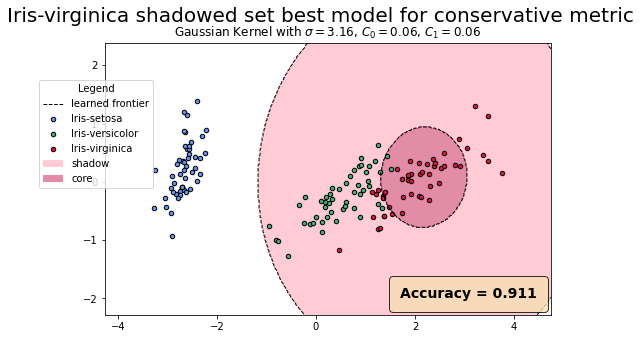

In [10]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors)

## Iris-virginica non-conservative metric GridSearch

In [ ]:
C0_range = np.concatenate((np.logspace(-1, 0, 5), []))
C1_range = np.concatenate((np.logspace(-1, 0, 5), []))
sigma_range = np.concatenate((np.logspace(-1, 1, 5), []))
param_grid = {'C0': C0_range, 'C1': C1_range, 'sigma': sigma_range}

In [ ]:
gs_res = grid_search(dataset_loader, estimator, 'non-conservative', param_grid, log=log, dim=2)

In [ ]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors)

## Iris-versicolor conservative metric GridSearch

In [ ]:
dataset_loader = lambda: load_iris(d='all', target='Iris-versicolor')
contourf_colors = ['white', 'aquamarine', 'lightseagreen', 'red']

In [ ]:
C0_range = np.concatenate((np.logspace(-1, 0, 5), []))
C1_range = np.concatenate((np.logspace(-1, 0, 5), []))
sigma_range = np.concatenate((np.logspace(-1, 1, 5), []))
param_grid = {'C0': C0_range, 'C1': C1_range, 'sigma': sigma_range}

In [ ]:
gs_res = grid_search(dataset_loader, estimator, 'conservative', param_grid, log=log, dim=2)

In [ ]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors)

## Iris-versicolor non-conservative metric GridSearch

In [ ]:
C0_range = np.concatenate((np.logspace(-1, 0, 5), []))
C1_range = np.concatenate((np.logspace(-1, 0, 5), []))
sigma_range = np.concatenate((np.logspace(-1, 1, 5), []))
param_grid = {'C0': C0_range, 'C1': C1_range, 'sigma': sigma_range}

In [ ]:
gs_res = grid_search(dataset_loader, estimator, 'non-conservative', param_grid, log=log, dim=2)

In [ ]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors)

## Iris-setosa conservative metric GridSearch

In [ ]:
dataset_loader = lambda: load_iris(d='all', target='Iris-setosa')
contourf_colors = ['white', 'lightskyblue', 'steelblue', 'red']

In [ ]:
C0_range = [0.1, 0.3, 0.7, 1, 5]
C1_range = [0.1, 0.3, 0.5, 0.7, 1]
sigma_range = [.1, .5, 1, 1.32, 1.5, 2]
param_grid = {'C0': C0_range, 'C1': C1_range, 'sigma': sigma_range}

In [ ]:
gs_res = grid_search(dataset_loader, estimator, 'conservative', param_grid, log=log, dim=2)

In [ ]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors)

## Iris-setosa non-conservative metric GridSearch

In [ ]:
C0_range = [0.1, 0.3, 0.7, 1, 5]
C1_range = [0.1, 0.3, 0.7, 1]
sigma_range = [ .1, .3, .5, 1, 1.5, 2]
param_grid = {'C0': C0_range, 'C1': C1_range, 'sigma': sigma_range}

In [ ]:
gs_res = grid_search(dataset_loader, estimator, 'non-conservative', param_grid, log=log, dim=2)

In [ ]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors)

In [ ]:
log_last_execution('Finished Grid Search for TensorFlow Two Phases Models on Iris dataset', log)